In [1]:
# Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
import numpy as np
import contextily as ctx
import mapclassify

In [2]:
# Reading data from the shapefile 
merida20 = gpd.read_file("merida_kanasing_ageb_censo_data/merida_kanasing_ageb_censo_data.shp")
merida20 = merida20[['CVEGEO', 'POBTOT', 'geometry']]
merida20.rename(columns={'POBTOT':'POBTOT2020'},
               inplace=True)
# Reprojecting to projected coordinate system
merida20 = merida20.to_crs(epsg=4485)
merida20.head()

,CVEGEO,POBTOT2020,geometry
0,3105000010027,21,"POLYGON ((2754849.653 2488201.053, 2754860.000..."
1,3105000010031,253,"POLYGON ((2771776.890 2478590.322, 2771690.909..."
2,3105000010120,1444,"POLYGON ((2764143.656 2479289.504, 2764145.335..."
3,3105000010154,186,"POLYGON ((2752865.731 2469623.554, 2752868.219..."
4,3105000010169,1580,"POLYGON ((2761880.766 2478332.690, 2761889.991..."


In [3]:
# Reading data from the shapefile 
merida10 = gpd.read_file("merida_kanasin_2010/merida_kanasin2010.shp")
merida10 = merida10[['CVEGEO', 'pobtot']]
merida10.rename(columns={'pobtot':'POBTOT2010'},
               inplace=True)
merida10.head()

,CVEGEO,POBTOT2010
0,3105000010120,1642.0
1,3105000010169,1618.0
2,3105000010188,1709.0
3,310500001021A,1666.0
4,3105000010224,926.0


In [4]:
merida2010_20 = merida20.merge(merida10, on=['CVEGEO'], how='outer')
merida2010_20 = merida2010_20.dropna()

In [5]:
merida2010_20.isnull().sum()

CVEGEO        0
POBTOT2020    0
geometry      0
POBTOT2010    0
dtype: int64

In [6]:
merida2010_20 = merida2010_20[['CVEGEO', 'POBTOT2010','POBTOT2020', 'geometry']]
merida2010_20
merida2010_20.to_file("pobtotComparation20102020.shp")

In [7]:
total2010 = merida2010_20['POBTOT2010'].sum()
total2020 = merida2010_20['POBTOT2020'].sum()

In [8]:
merida2010_20['Difference'] = ((merida2010_20['POBTOT2010']-merida2010_20['POBTOT2020']))
merida2010_20['Difference'].head()

2    198.0
4     38.0
5    171.0
6     95.0
7    232.0
Name: Difference, dtype: float64

In [9]:
#merida2010_20['Difference'].sort_values()
meridaNeg = (merida2010_20.loc[merida2010_20['Difference'] < 0])
meridaPos = merida2010_20.loc[merida2010_20['Difference'] >= 0]

In [10]:
meridaNeg['Difference'] = meridaNeg['Difference'].abs()

In [11]:
meridaNeg.head()

,CVEGEO,POBTOT2010,POBTOT2020,geometry,Difference
11,3105000010296,992.0,999.0,"POLYGON ((2760896.157 2476434.241, 2760893.852...",7.0
23,3105000010440,739.0,760.0,"POLYGON ((2761443.980 2474867.516, 2761440.637...",21.0
50,310500001078A,982.0,1455.0,"POLYGON ((2758565.513 2467497.722, 2758573.397...",473.0
52,3105000010826,3751.0,3855.0,"POLYGON ((2763542.504 2470705.961, 2763540.798...",104.0
65,3105000011523,1539.0,1795.0,"POLYGON ((2760660.349 2482741.857, 2760773.799...",256.0


In [12]:
meridaPos.head()

,CVEGEO,POBTOT2010,POBTOT2020,geometry,Difference
2,3105000010120,1642.0,1444.0,"POLYGON ((2764143.656 2479289.504, 2764145.335...",198.0
4,3105000010169,1618.0,1580.0,"POLYGON ((2761880.766 2478332.690, 2761889.991...",38.0
5,3105000010188,1709.0,1538.0,"POLYGON ((2764110.007 2478349.070, 2764166.774...",171.0
6,310500001021A,1666.0,1571.0,"POLYGON ((2760966.319 2476809.061, 2760907.648...",95.0
7,3105000010224,926.0,694.0,"POLYGON ((2761747.489 2477244.065, 2761744.829...",232.0


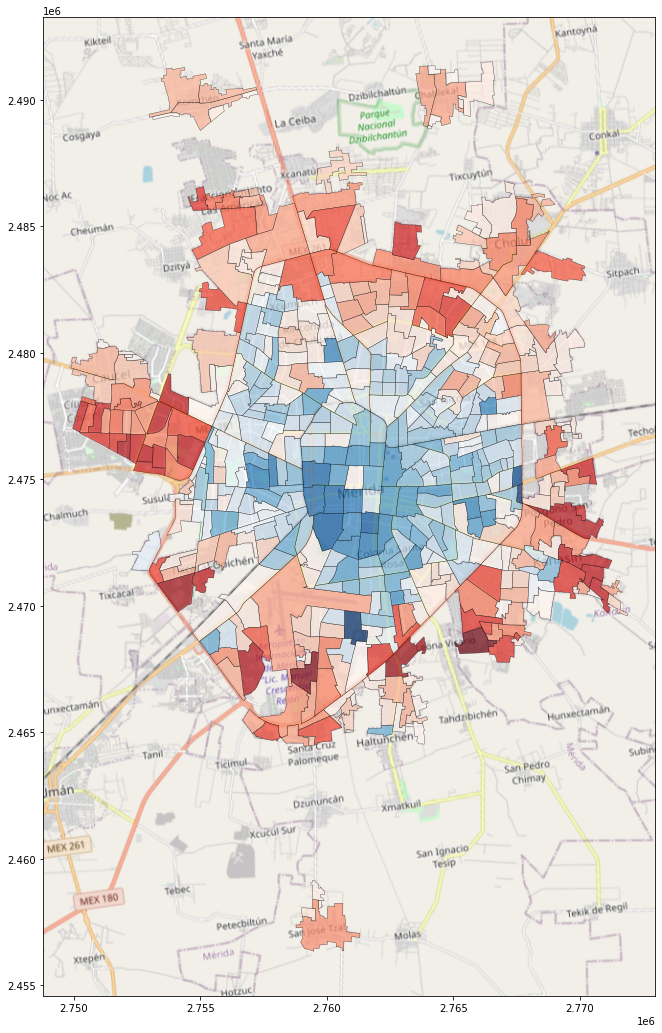

In [15]:
f, ax = plt.subplots(1, figsize=(18, 18))
meridaNeg.plot(ax=ax, column='Difference', 
               scheme='fisherjenks', k=19,
         cmap='Reds' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7, 
       )
meridaPos.plot(ax=ax, column='Difference', 
               scheme='fisherjenks', k=19,
         cmap='Blues' , edgecolor='black',
        linewidth=0.4, 
        alpha=0.7
       )
contextily.add_basemap(ax, crs=merida2010_20.crs, url=ctx.tile_providers.OSM_A)
plt.savefig('prueba3.jpg')